In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


******************** Data Preprocessing***************************

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("/content/drive/MyDrive/MLProjects/FinalProject/housing.csv")
df
## drop NAN entries
df.dropna(inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [40]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
train_data = X_train.join(y_train)
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5704,-118.26,34.23,38.0,1107.0,194.0,518.0,195.0,7.5582,<1H OCEAN,263700.0
17272,-119.71,34.41,18.0,1225.0,317.0,694.0,306.0,3.6823,NEAR OCEAN,255000.0
832,-122.02,37.60,31.0,2155.0,522.0,1858.0,437.0,2.6520,NEAR BAY,159800.0
461,-122.26,37.87,52.0,2773.0,998.0,1721.0,949.0,1.1859,NEAR BAY,241700.0
20438,-118.79,34.26,17.0,1986.0,249.0,761.0,241.0,7.2137,<1H OCEAN,401900.0
...,...,...,...,...,...,...,...,...,...,...
18564,-121.74,36.92,29.0,1210.0,281.0,863.0,262.0,3.1062,<1H OCEAN,156000.0
683,-122.14,37.68,27.0,3337.0,613.0,1489.0,607.0,3.6364,NEAR BAY,219200.0
16857,-122.40,37.62,32.0,3586.0,921.0,2249.0,911.0,3.1058,NEAR OCEAN,253000.0
20551,-121.78,38.69,31.0,2547.0,535.0,1579.0,509.0,2.6774,INLAND,95800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

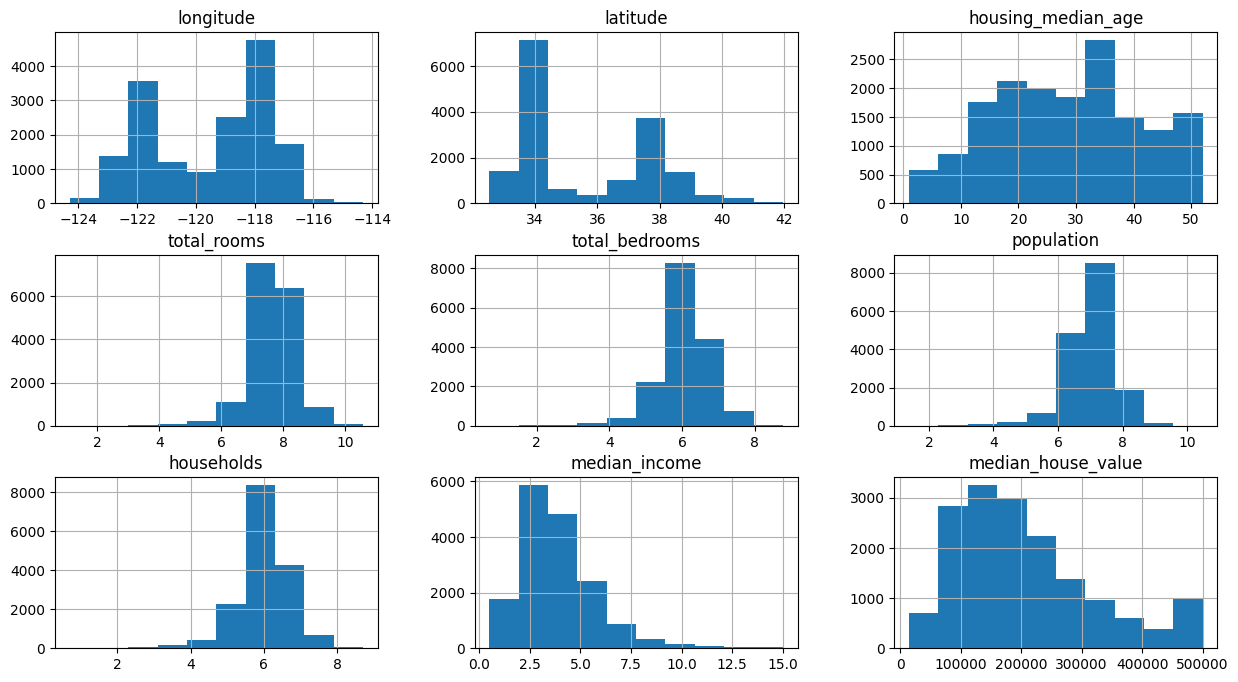

In [41]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data.hist(figsize=(15,8))

In [42]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: xlabel='latitude', ylabel='longitude'>

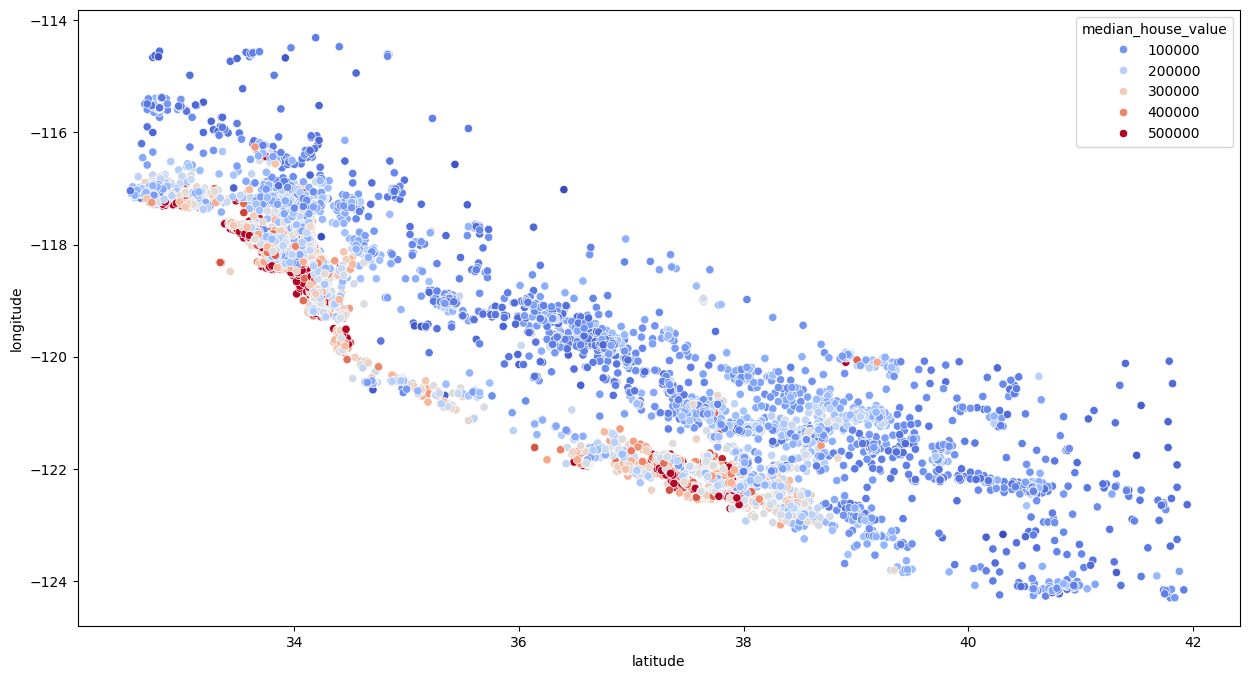

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y = "longitude", data=train_data,hue="median_house_value",palette="coolwarm" )

## Complete this code

******************** Feature Engineering ***************************

In [44]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/ train_data['households']

<Axes: >

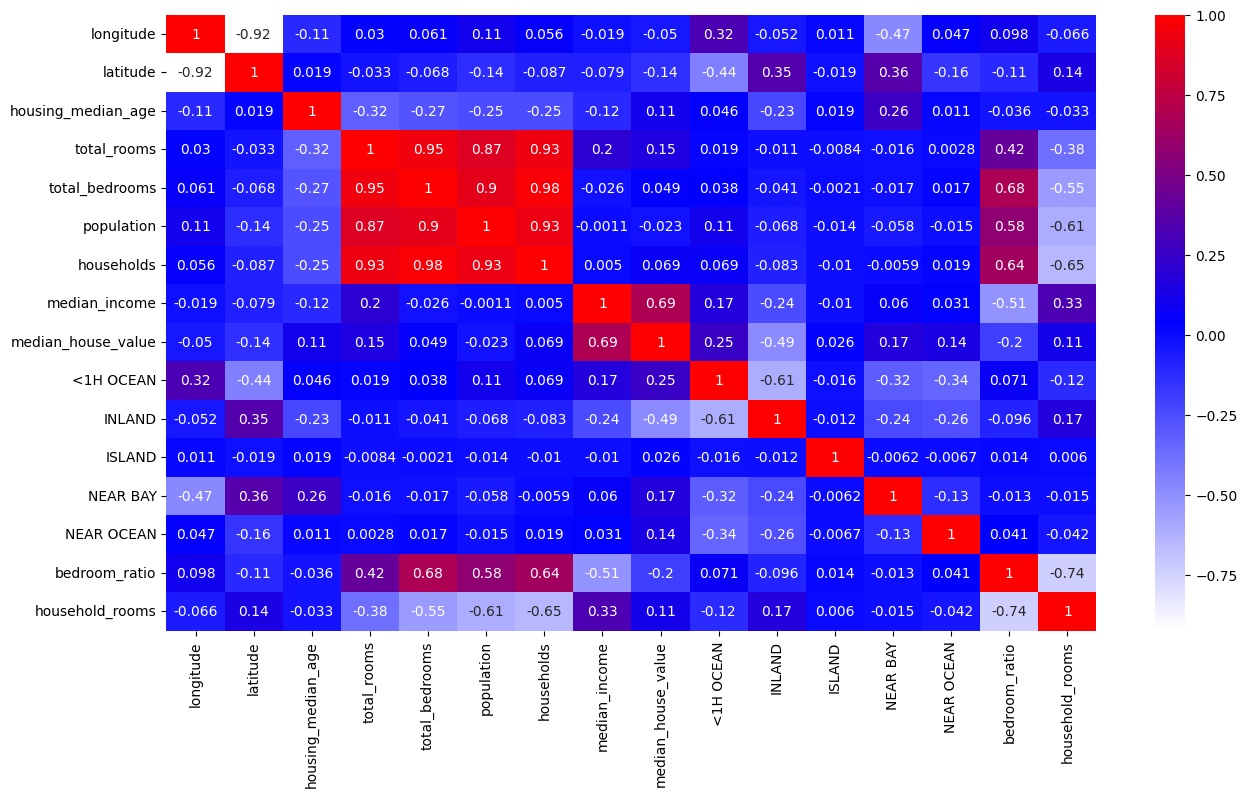

In [45]:
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#ffffff", "#0000ff", "#ff0000"])
plt.figure(figsize=(15,8))
#sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")
sns.heatmap(train_data.corr(), annot=True, cmap=custom_cmap)

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # evaluation metrics for regression models

In [47]:
X = train_data
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
5704,-118.26,34.23,38.0,7.010312,5.273000,6.251904,5.278115,7.5582,263700.0,1,0,0,0,0,0.752178,1.328185
17272,-119.71,34.41,18.0,7.111512,5.762051,6.543912,5.726848,3.6823,255000.0,0,0,0,0,1,0.810243,1.241785
832,-122.02,37.60,31.0,7.676010,6.259581,7.527794,6.082219,2.6520,159800.0,0,0,0,1,0,0.815473,1.262041
461,-122.26,37.87,52.0,7.928046,6.906755,7.451242,6.856462,1.1859,241700.0,0,0,0,1,0,0.871180,1.156288
20438,-118.79,34.26,17.0,7.594381,5.521461,6.635947,5.488938,7.2137,401900.0,1,0,0,0,0,0.727046,1.383579


In [48]:
X_train, y_train = train_data.drop(['median_house_value'], axis =1), train_data['median_house_value']
X_train
train_columns = X_train.columns
train_columns



Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'bedroom_ratio', 'household_rooms'],
      dtype='object')

In [49]:
print(f"Shape of X_train: {X_train.shape}\nShape of y_train: {y_train.shape}\nShape of X_test: {X_test.shape}\nShape of y_test: {y_test.shape}")

Shape of X_train: (16346, 15)
Shape of y_train: (16346,)
Shape of X_test: (4087, 9)
Shape of y_test: (4087,)


******************** Training Model***************************

Linear Regression

In [50]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

###### Random Forest Regressor

In [51]:

RanF = RandomForestRegressor()
RanF.fit(X_train, y_train)


RandomForestRegressor()

Gradient Boosting Regressor

In [52]:
GradR = GradientBoostingRegressor()
GradR.fit(X_train, y_train)


GradientBoostingRegressor()

********* Preparing Test Data ************

In [55]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/ test_data['households']



In [56]:

X_test, y_test = test_data.drop(['median_house_value'], axis =1), test_data['median_house_value']

# Add missing columns to test data and ensure the order is the same as training data
for col in train_columns:
    if col not in X_test.columns:
        X_test[col] = 0
X_test = X_test[train_columns]

X_test



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9271,-122.62,38.15,14.0,7.723120,5.834811,7.028201,5.849325,6.4092,1,0,0,0,0,0.755499,1.320344
19754,-122.19,40.20,30.0,7.919720,6.167516,7.167809,6.142037,3.5305,0,1,0,0,0,0.778754,1.289429
19676,-121.63,39.16,7.0,7.539027,6.098074,6.971669,6.018593,2.4183,0,1,0,0,0,0.808868,1.252623
3438,-118.42,34.26,37.0,7.489971,6.052089,7.731931,6.021023,3.9000,1,0,0,0,0,0.808026,1.243970
259,-122.20,37.77,41.0,7.344719,6.030685,6.932448,5.834811,2.0562,0,0,0,1,0,0.821091,1.258776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7918,-118.09,33.87,31.0,8.160232,6.591674,7.649216,6.548219,3.9837,1,0,0,0,0,0.807780,1.246176
706,-122.04,37.65,10.0,9.024011,7.190676,8.250098,7.161622,6.2579,0,0,0,1,0,0.796838,1.260051
4166,-118.20,34.11,37.0,7.621195,6.416732,7.437795,6.302619,1.9355,1,0,0,0,0,0.841959,1.209211
6600,-118.17,34.18,44.0,7.245655,5.509388,6.410175,5.605802,2.8472,1,0,0,0,0,0.760371,1.292528


************ Predicting using the test data ***************

In [57]:
linear_pred = reg.predict(X_test)

r2   = r2_score(y_test, linear_pred)             #   R-squared (R²)
mae  = mean_absolute_error(y_test, linear_pred)  # Mean Absolute Error
mse  = mean_squared_error(y_test, linear_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                          # Root Mean Squared Error
print("Co-efficient of determinent is: ", r2)
print("Mean Absolute Error is: ", mae)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

Co-efficient of determinent is:  0.6654659083659147
Mean Absolute Error is:  48574.33204409826
Mean Squared Error is:  4496533846.40217
Root Mean Squared Error is:  67056.19916459752


In [65]:

comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': linear_pred.flatten()
})

comparison_df_sorted = comparison_df.assign(Difference=abs(comparison_df['Actual'] - comparison_df['Predicted'])).sort_values(by='Difference')


#comparison_df_sorted.drop(columns=['Difference'], inplace=True)

print(comparison_df_sorted)



         Actual      Predicted     Difference
18111  326300.0  326326.091212      26.091212
19219  190300.0  190350.489878      50.489878
3708   171600.0  171535.491328      64.508672
18420  259300.0  259234.580327      65.419673
886    220800.0  220865.666926      65.666926
...         ...            ...            ...
16643  300000.0   -6024.596418  306024.596418
10454  500001.0  176945.811923  323055.188077
6639   500001.0  166266.981878  333734.018122
12138  500001.0   61628.422049  438372.577951
18501  131300.0  743744.489341  612444.489341

[4087 rows x 3 columns]


In [59]:
ran_pred = RanF.predict(X_test)


r2   = r2_score(y_test, ran_pred)             #   R-squared (R²)
mae  = mean_absolute_error(y_test, ran_pred)  # Mean Absolute Error
mse  = mean_squared_error(y_test, ran_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                          # Root Mean Squared Error
print("Co-efficient of determinent is: ", r2)
print("Mean Absolute Error is: ", mae)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

Co-efficient of determinent is:  0.8182862782686712
Mean Absolute Error is:  32561.9680866161
Mean Squared Error is:  2442447333.631853
Root Mean Squared Error is:  49421.12234289963


In [64]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': ran_pred.flatten()
})


comparison_df_sorted = comparison_df.assign(Difference=abs(comparison_df['Actual'] - comparison_df['Predicted'])).sort_values(by='Difference')


#comparison_df_sorted.drop(columns=['Difference'], inplace=True)

print(comparison_df_sorted)

         Actual  Predicted  Difference
5250   500001.0  500001.00        0.00
8797   500001.0  500001.00        0.00
4345   500001.0  500001.00        0.00
5244   500001.0  500001.00        0.00
8793   500001.0  500001.00        0.00
...         ...        ...         ...
6639   500001.0  206104.04   293896.96
17321  500001.0  193282.00   306719.00
12138  500001.0  175086.12   324914.88
18501  131300.0  471955.76   340655.76
10454  500001.0  136643.01   363357.99

[4087 rows x 3 columns]


In [61]:
grad_pred = GradR.predict(X_test)


r2   = r2_score(y_test, grad_pred)             #  R-squared (R²)
mae  = mean_absolute_error(y_test, grad_pred)  #  Mean Absolute Error
mse  = mean_squared_error(y_test, grad_pred)   #  Mean Squared Error
rmse = np.sqrt(mse)                          # Root Mean Squared Error
print("Co-efficient of determinent is: ", r2)
print("Mean Absolute Error is: ", mae)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

Co-efficient of determinent is:  0.7711178423142658
Mean Absolute Error is:  38741.59755931269
Mean Squared Error is:  3076446899.161414
Root Mean Squared Error is:  55465.727248107134


In [66]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': grad_pred.flatten()
})


comparison_df_sorted = comparison_df.assign(Difference=abs(comparison_df['Actual'] - comparison_df['Predicted'])).sort_values(by='Difference')

#comparison_df_sorted.drop(columns=['Difference'], inplace=True)

print(comparison_df_sorted)

         Actual      Predicted     Difference
13318  111200.0  111203.904881       3.904881
13497   67800.0   67811.609355      11.609355
15385  117000.0  116926.566808      73.433192
551    275000.0  274925.744944      74.255056
16688  153000.0  153110.779713     110.779713
...         ...            ...            ...
17321  500001.0  201570.894678  298430.105322
6639   500001.0  187275.604309  312725.395691
18501  131300.0  472425.598745  341125.598745
10454  500001.0  153549.625001  346451.374999
12138  500001.0  122182.816670  377818.183330

[4087 rows x 3 columns]
